In [24]:
import os
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [3]:
weights_file = os.path.join('/', 'Users', 'yjkim', 'data', 'weights', 
                            'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [4]:
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)
pre_trained_model.load_weights(weights_file)

In [5]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [6]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [7]:
last_layer = pre_trained_model.get_layer('mixed7')
print(f'last layer output shape: {last_layer.output_shape}')
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [9]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classificaiton
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=pre_trained_model.input, outputs=x)
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
base_dir = os.path.join('/', 'Users', 'yjkim', 'data', 'images', 'cats_and_dogs')

In [12]:
# Set image location
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [13]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

In [16]:
# Add data-augmentaion parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            steps_per_epoch=100,
            epochs=10,
            validation_steps=50,
            verbose=2)

Epoch 1/10
100/100 - 76s - loss: 0.3369 - accuracy: 0.8655 - val_loss: 0.1328 - val_accuracy: 0.9440
Epoch 2/10
100/100 - 74s - loss: 0.2233 - accuracy: 0.9150 - val_loss: 0.1002 - val_accuracy: 0.9580
Epoch 3/10
100/100 - 72s - loss: 0.2104 - accuracy: 0.9275 - val_loss: 0.1075 - val_accuracy: 0.9610
Epoch 4/10
100/100 - 71s - loss: 0.1789 - accuracy: 0.9300 - val_loss: 0.0960 - val_accuracy: 0.9650
Epoch 5/10
100/100 - 74s - loss: 0.1906 - accuracy: 0.9355 - val_loss: 0.1108 - val_accuracy: 0.9600
Epoch 6/10
100/100 - 74s - loss: 0.1807 - accuracy: 0.9380 - val_loss: 0.1463 - val_accuracy: 0.9550
Epoch 7/10
100/100 - 71s - loss: 0.1505 - accuracy: 0.9480 - val_loss: 0.1097 - val_accuracy: 0.9680
Epoch 8/10
100/100 - 70s - loss: 0.1794 - accuracy: 0.9415 - val_loss: 0.1635 - val_accuracy: 0.9580
Epoch 9/10
100/100 - 75s - loss: 0.1764 - accuracy: 0.9455 - val_loss: 0.1025 - val_accuracy: 0.9660
Epoch 10/10
100/100 - 76s - loss: 0.1426 - accuracy: 0.9550 - val_loss: 0.1275 - val_accura

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

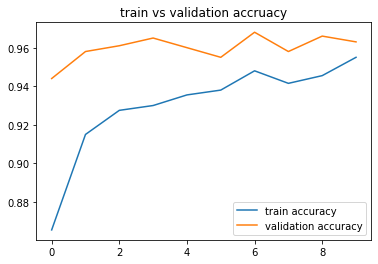

In [25]:
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.title("train vs validation accruacy")
plt.show()

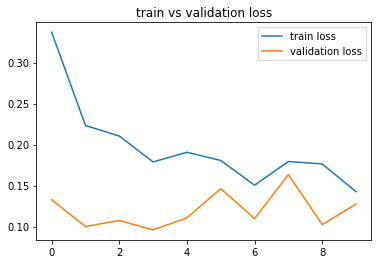

In [26]:
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.title("train vs validation loss")
plt.show()